# Treinamento de modelo a partir de um dataset do kaggle

Vamos usar várias técnicas para treinar o modelo

In [ ]:
pip install wordcloud
pip install seaborn
pip install nltk

In [ ]:
nltk.download('all')

In [88]:
pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from nltk import ngrams
import seaborn as sns
import unidecode

In [62]:
caminho = r"C:\Users\gabri\sentimental analysis\sentimentalanalisysagro\archive\sentiment_analysis_pt_br.csv"
dados = pd.read_csv(caminho)

In [63]:
dados.head()

,Sentence,Sentiment
0,A tecnologia GeoSolutions aproveitará as soluç...,positive
1,"$ Esi em baixos, queda de US $ 1,50 a US $ 2,5...",negative
2,"No último trimestre de 2010, as vendas líquida...",positive
3,De acordo com a Câmara de Comércio Finlandesa-...,neutral
4,A empresa de compra sueca vendeu sua participa...,neutral


In [64]:
dados.shape

(5842, 2)

In [65]:
dados.value_counts("Sentiment")

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

# Transformando dados em númericos

In [66]:
# usando a técnica de bag of words

vetorizar = CountVectorizer(lowercase = False, max_features = 50)

bag_of_words = vetorizar.fit_transform(dados.Sentence)
print(bag_of_words.shape)

(5842, 50)


In [67]:
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, dados.Sentiment, random_state = True)

In [68]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_teste, y_teste)
print(acuracia)

0.5550992470910335


In [69]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    # Passo de vetorizar
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    # Separando dados para treino e teste
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    # Regressão logistica
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [70]:
classificar_texto(dados, 'Sentence', 'Sentiment')

Acurácia do modelo com 'Sentence': 58.25%


In [71]:
# Criamos essa forma de visualização para melhorar a análise da frequencia de palavras
def grafico_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y ="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()

In [72]:
# Nuvem de palavras: usamos isso para ter uma visualização de quais palavras são mais frequentes
def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"Sentiment == '{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto_sentimento)
  nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110, collocations=False).generate(texto_unido)

  plt.figure(figsize = (10, 7))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

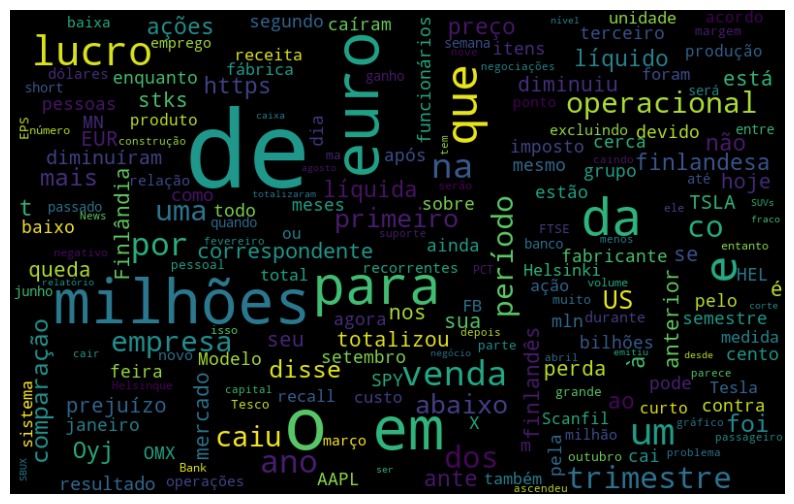

In [73]:
nuvem_palavras(dados, 'Sentence', 'negative')

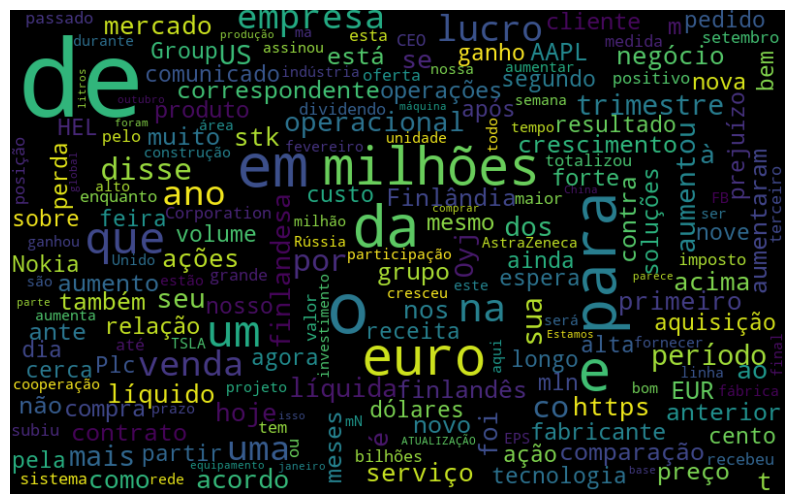

In [74]:
nuvem_palavras(dados, 'Sentence', 'positive')

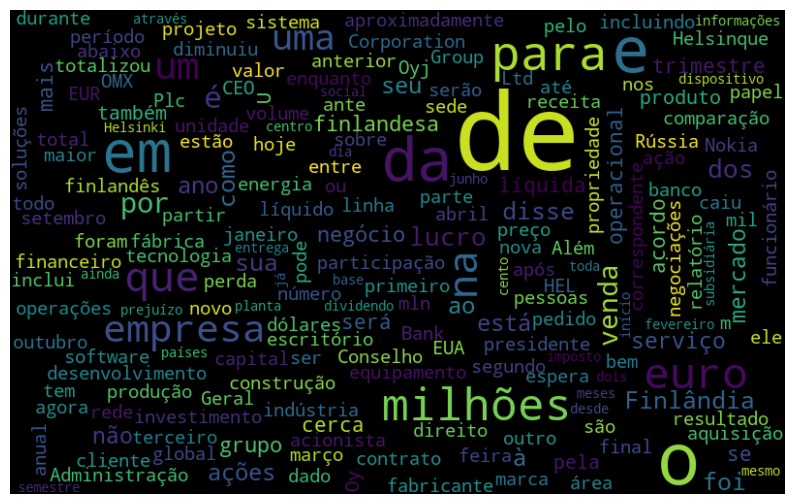

In [75]:
nuvem_palavras(dados, 'Sentence', 'neutral')

Aqui vemos que os dados tem muitas palavras desnecessárias como 'de', 'em' e outros...
Vamos fazer uma limpeza para melhorar isso

# Tokenização

In [76]:
todas_palavras = ' '.join([texto for texto in dados.Sentence])

In [77]:
# Vamos iniciar vendo a frequencia de cada palavra

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
token_frase

['A',
 'tecnologia',
 'GeoSolutions',
 'aproveitará',
 'as',
 'soluções',
 'GPS',
 'da',
 'Benefon,',
 'fornecendo',
 'tecnologia',
 'de',
 'pesquisa',
 'baseada',
 'em',
 'localização,',
 'uma',
 'plataforma',
 'de',
 'comunidades,',
 'conteúdo',
 'multimídia',
 'relevante',
 'de',
 'localização',
 'e',
 'um',
 'novo',
 'e',
 'poderoso',
 'modelo',
 'comercial.',
 '$',
 'Esi',
 'em',
 'baixos,',
 'queda',
 'de',
 'US',
 '$',
 '1,50',
 'a',
 'US',
 '$',
 '2,50',
 'BK',
 'uma',
 'possibilidade',
 'real',
 'No',
 'último',
 'trimestre',
 'de',
 '2010,',
 'as',
 'vendas',
 'líquidas',
 'da',
 'Componente',
 'dobraram',
 'para',
 '131m',
 'a',
 'partir',
 'de',
 '76',
 'milhões',
 'de',
 'euros',
 'para',
 'o',
 'mesmo',
 'período',
 'do',
 'ano',
 'anterior,',
 'enquanto',
 'passavam',
 'para',
 'um',
 'lucro',
 'pré-imposto',
 'zero',
 'com',
 'uma',
 'perda',
 'antes',
 'de',
 'impostos',
 'de',
 'euros.',
 'De',
 'acordo',
 'com',
 'a',
 'Câmara',
 'de',
 'Comércio',
 'Finlandesa-Rússi

In [78]:
frequencia = nltk.FreqDist(token_frase)

In [79]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
df_frequencia.head()

,Palavra,Frequência
0,A,1374
1,tecnologia,76
2,GeoSolutions,1
3,aproveitará,1
4,as,568


In [80]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavra,Frequência
10,de,11340
22,e,2602
34,a,2482
13,em,2421
7,da,2124
47,para,1970
53,o,1800
51,milhões,1614
56,do,1441
0,A,1374


In [81]:
## removendo stop words, retiramos elas pois podem aumentar o ruído do modelo diminuindo assim a eficácia

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [82]:
frase_processada = []

for opiniao in dados.Sentence:
  palavras_texto = token_espaco.tokenize(opiniao)
  # para cada opnião iremos tokenizar o texto e na nova_frase vamos guardar uma variavel sem as palavras irrelevantes
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_1'] = frase_processada

In [83]:
classificar_texto(dados, 'tratamento_1', 'Sentiment')

Acurácia do modelo com 'tratamento_1': 59.89%


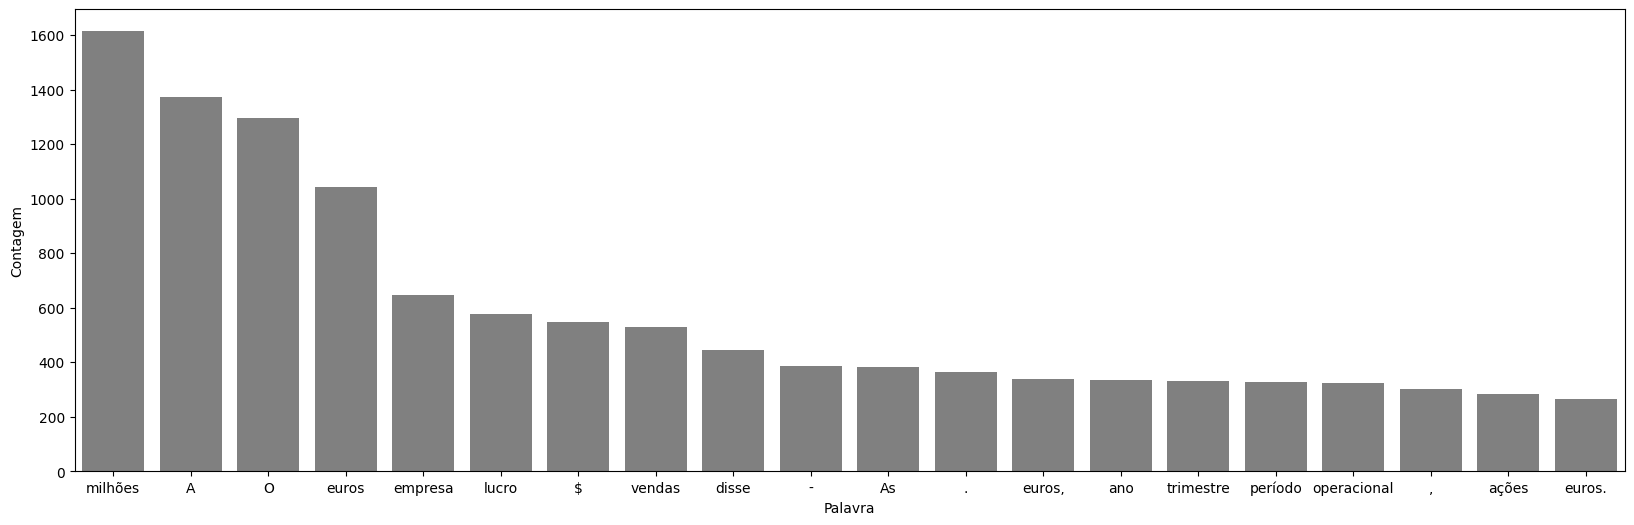

In [56]:
grafico_frequencia(dados, 'tratamento_1',20)

In [85]:
#removendo pontuações
frase_processada = []
token_pontuacao = tokenize.WordPunctTokenizer()

for opiniao in dados['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

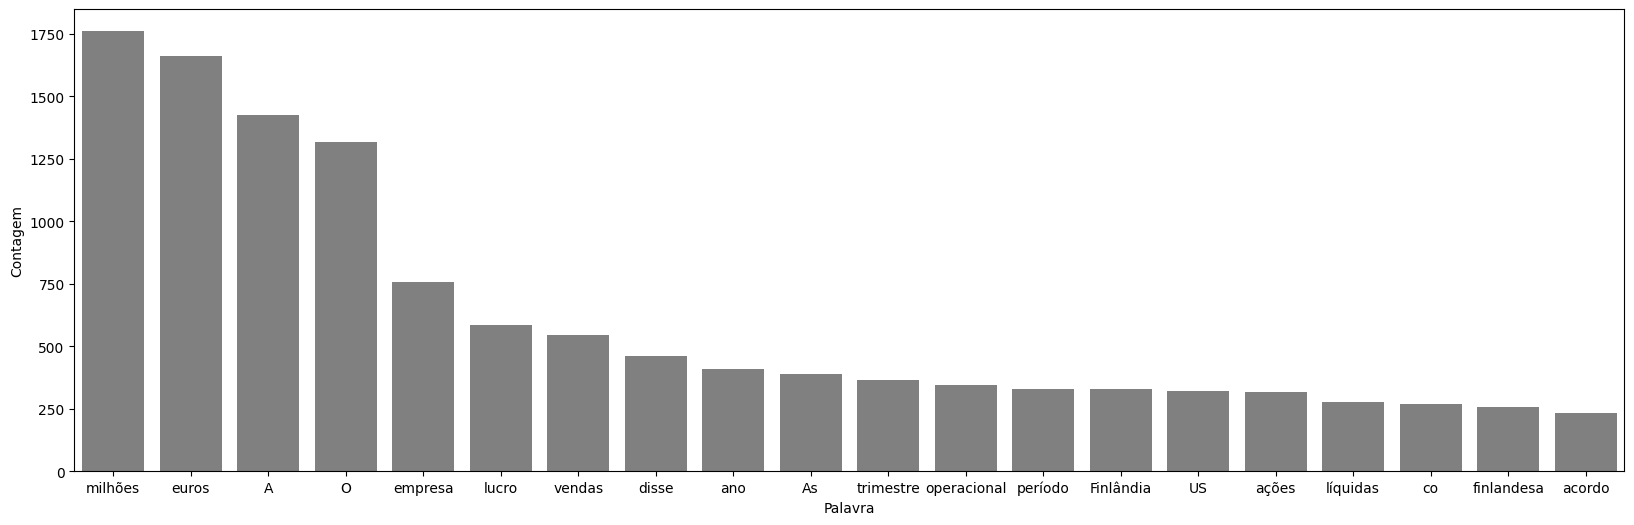

In [87]:
grafico_frequencia(dados, 'tratamento_2', 20)

In [90]:
# Removendo acentuação
sem_acentos = [unidecode.unidecode(texto) for texto in dados.tratamento_2]

stop_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [91]:
dados['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in dados.tratamento_3:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada

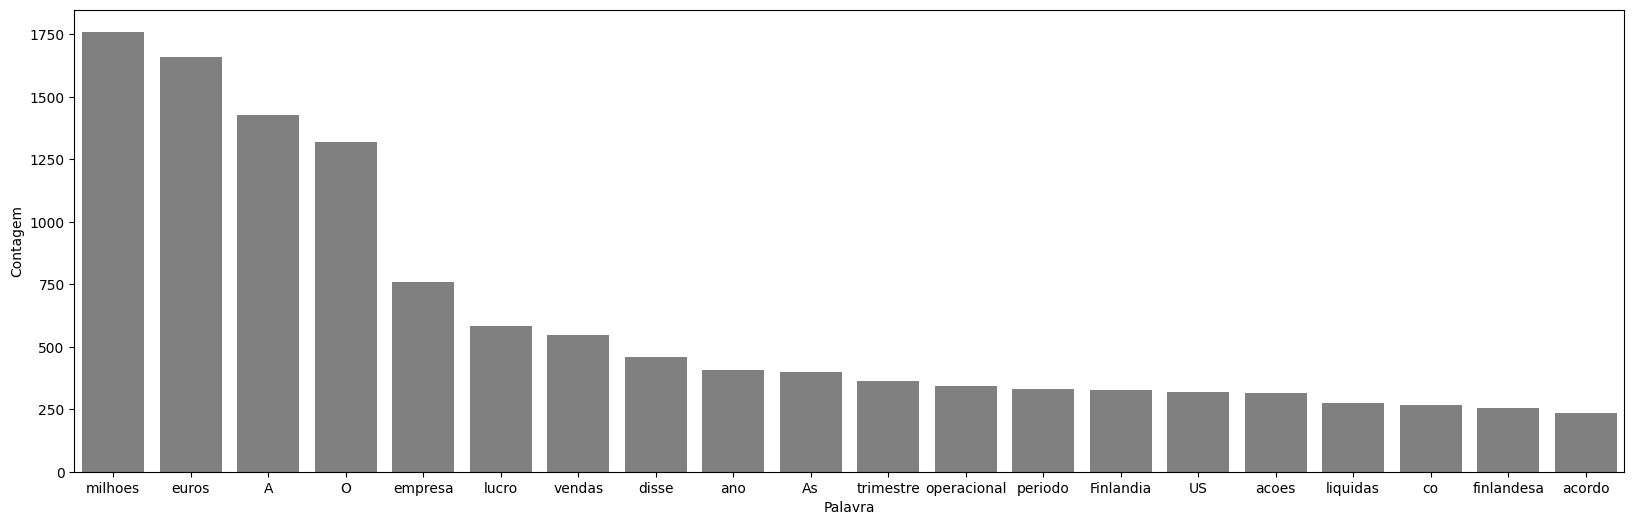

In [92]:
grafico_frequencia(dados, 'tratamento_3', 20)

In [93]:
frase_processada = []
# Colocando tudo em letras minusculas

for opiniao in dados['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada

In [95]:
classificar_texto(dados, 'tratamento_4', 'Sentiment')

Acurácia do modelo com 'tratamento_4': 59.41%


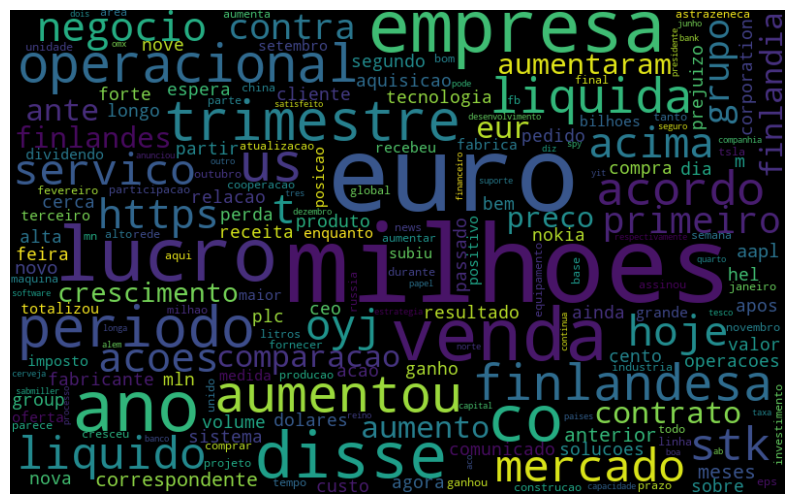

In [96]:
nuvem_palavras(dados, 'tratamento_4', 'positive')

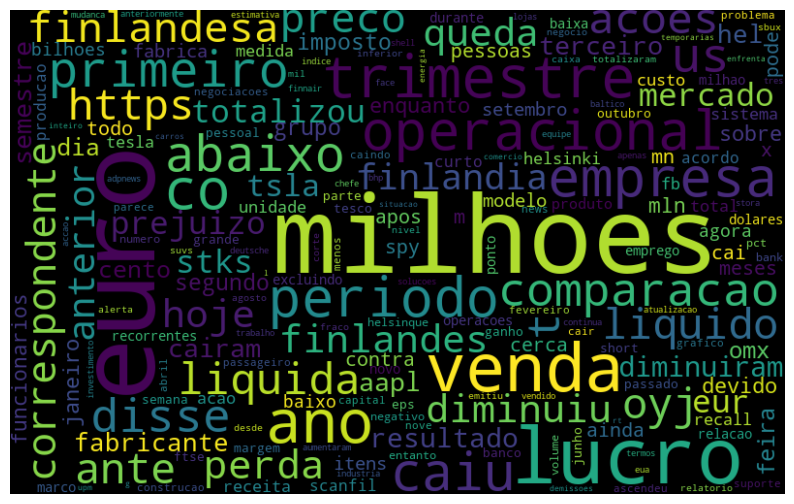

In [97]:
nuvem_palavras(dados, 'tratamento_4', 'negative')

# Stemmer

Stemmer é uma ferramenta de processamento de linguagem natural (PLN) utilizada para reduzir palavras ao seu radical ou raiz comum. O objetivo principal é eliminar variações morfológicas das palavras, como sufixos, prefixos ou terminações, sem necessariamente produzir uma palavra válida no idioma. Isso ajuda a unificar palavras semelhantes em análises textuais.

Exemplo: 'gostei', 'gostado', 'gostar' podem ser reduzidas ao mesmo radical 'gost'.

In [98]:
stemmer = nltk.RSLPStemmer()

In [99]:
# simplificando as palavras

frase_processada = []

for opiniao in dados['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto if palavra not in stop_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_5'] = frase_processada

In [100]:
classificar_texto(dados, 'tratamento_5', 'Sentiment')

Acurácia do modelo com 'tratamento_5': 63.04%


# TFIDF

O TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica de ponderação de palavras amplamente utilizada em processamento de linguagem natural (PLN) e mineração de textos. Seu objetivo é medir a *importância* de uma palavra em um documento em relação a um conjunto de documentos (corpus), ajudando a identificar os termos mais relevantes para análise.

In [105]:
tfidf = TfidfVectorizer(lowercase = False, max_features=50)
tfidf_bruto = tfidf.fit_transform(dados.Sentence)
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 56.26%


In [106]:
tfidf_tratados = tfidf.fit_transform(dados.tratamento_5)
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 60.78%


In [109]:
#Capturando contextos

tfidf_50 = TfidfVectorizer(lowercase = False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(dados.tratamento_5)

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'acuracia do modelo: {acuracia_ngrams*100:.2f}')

acuracia do modelo: 59.69


In [110]:
tfidf_100 = TfidfVectorizer(lowercase = False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(dados.tratamento_5)

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'acuracia do modelo: {acuracia_ngrams*100:.2f}')

acuracia do modelo: 62.22


Vamos escolher esse modelo tfidf_1000 pois foi o modelo com melhor acurácia até o momento

In [111]:
tfidf_1000 = TfidfVectorizer(lowercase = False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(dados.tratamento_5)

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'acuracia do modelo: {acuracia_ngrams*100:.2f}')

acuracia do modelo: 70.02


In [112]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)
pesos.nlargest(10, columns=0)

,0
qued,2.795991
caiu,2.642356
abaix,2.566163
diminu,2.451985
cair,2.294500
spy,2.009142
cai,1.931374
perd,1.700986
frac,1.566199
inferi,1.522901


# Importando modelo

In [114]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'regressao_logistica.pkl')

['regressao_logistica.pkl']

In [ ]:
# tfidf = joblib.load('tfidf_vectorizer.pkl')
# modelo = joblib.load('regressao_logistica.pkl')
'''novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_predicoes = pd.DataFrame({
    'Avaliacao': novas_avaliacoes,
    'Sentimento': predicoes
})
df_predicoes '''